#### 3-Sigma technique (Standard Deviation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
data = pd.read_csv(r'E:\newGithubfile\Data-Science-Pojects\churn Analysis\raw_sales.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
# Function to Detection Outlier on one-dimensional datasets.
def find_anomalies(data):
    # Define a list to accumulate anomalies
    anomalies = []

    # Set Upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-Standard Deviation

    anomaly_cut_off = random_data_std * 3 

    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off

    # Generate Outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)

    return anomalies        

In [6]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [7]:
list_1 = find_anomalies(data['price'])

In [8]:
len(list_1)

461

In [9]:
len(data)

29580

In [10]:
data.price.skew()

np.float64(4.312009366902367)

In [11]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

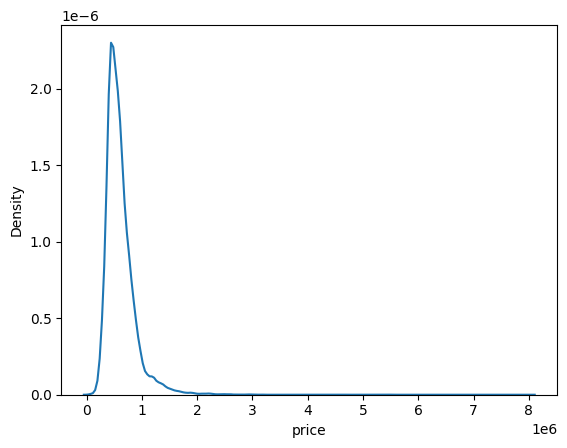

In [12]:
sns.kdeplot(data.price)

In [13]:
data['price_transformed'] = np.log(data.price)

In [14]:
data.price_transformed.skew()

np.float64(0.47316462699847633)

In [15]:
list_2 = find_anomalies(data.price_transformed)

In [16]:
len(list_2)

266

In [17]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [18]:
data['price_transformed_double'].skew()

np.float64(0.33092530655758595)

In [19]:
list_3 = find_anomalies(data.price_transformed_double)

In [20]:
len(list_3)

251

In [21]:
len(data)

29580